In [ ]:
import numpy
import pandas as pd
import keras

In [ ]:
data_1 = pd.read_csv("C:\\Users\Alaa\Dataset1.csv.csv")
data_2 = pd.read_csv("C:\\Users\Alaa\Dataset2.csv.csv")

In [ ]:
data_1.head()


,YEAR,MO,DY,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
0,1990,1,1,98.00,2.74,3.48,2.20,1.29,110.12,3.90,5.17,2.95,2.23,110.69
1,1990,1,2,97.84,3.95,5.38,3.16,2.21,257.62,6.34,7.85,4.21,3.64,257.75
2,1990,1,3,97.98,4.71,6.84,3.42,3.41,287.00,7.41,9.43,5.44,3.98,287.38
3,1990,1,4,98.36,4.02,6.16,1.82,4.34,303.38,5.88,8.83,2.58,6.25,303.75
4,1990,1,5,98.47,1.63,2.12,0.83,1.30,120.31,2.12,3.08,1.15,1.93,120.38


In [ ]:
data_2.head()


,YEAR,MO,DY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M
0,1990,1,1,13.92,1.54,7.73,12.90,13.58,21.58,8.00,47.38
1,1990,1,2,16.01,1.20,8.61,15.39,12.37,23.33,10.96,38.38
2,1990,1,3,12.61,6.30,9.45,12.76,12.31,19.23,6.91,67.12
3,1990,1,4,11.10,3.58,7.34,10.90,11.63,17.65,6.01,63.62
4,1990,1,5,11.48,0.30,5.89,9.97,10.32,17.48,7.16,47.50


In [ ]:
data= data_1.merge(data_2,on=["YEAR","MO","DY"])

In [ ]:
data.head()

,YEAR,MO,DY,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,...,WS50M_RANGE,WD50M,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M
0,1990,1,1,98.00,2.74,3.48,2.20,1.29,110.12,3.90,...,2.23,110.69,13.92,1.54,7.73,12.90,13.58,21.58,8.00,47.38
1,1990,1,2,97.84,3.95,5.38,3.16,2.21,257.62,6.34,...,3.64,257.75,16.01,1.20,8.61,15.39,12.37,23.33,10.96,38.38
2,1990,1,3,97.98,4.71,6.84,3.42,3.41,287.00,7.41,...,3.98,287.38,12.61,6.30,9.45,12.76,12.31,19.23,6.91,67.12
3,1990,1,4,98.36,4.02,6.16,1.82,4.34,303.38,5.88,...,6.25,303.75,11.10,3.58,7.34,10.90,11.63,17.65,6.01,63.62
4,1990,1,5,98.47,1.63,2.12,0.83,1.30,120.31,2.12,...,1.93,120.38,11.48,0.30,5.89,9.97,10.32,17.48,7.16,47.50


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11932 entries, 0 to 11931
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         11932 non-null  int64  
 1   MO           11932 non-null  int64  
 2   DY           11932 non-null  int64  
 3   PS           11932 non-null  float64
 4   WS10M        11932 non-null  float64
 5   WS10M_MAX    11932 non-null  float64
 6   WS10M_MIN    11932 non-null  float64
 7   WS10M_RANGE  11932 non-null  float64
 8   WD10M        11932 non-null  float64
 9   WS50M        11932 non-null  float64
 10  WS50M_MAX    11932 non-null  float64
 11  WS50M_MIN    11932 non-null  float64
 12  WS50M_RANGE  11932 non-null  float64
 13  WD50M        11932 non-null  float64
 14  T2M          11932 non-null  float64
 15  T2MDEW       11932 non-null  float64
 16  T2MWET       11932 non-null  float64
 17  TS           11932 non-null  float64
 18  T2M_RANGE    11932 non-null  float64
 19  T2M_

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable=['RH2M']
Predictors=['YEAR', 'MO', 'DY', 'PS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN','WS10M_RANGE','WD10M','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE','WD50M','T2M','T2MDEW','T2MWET','TS','T2M_RANGE','T2M_MAX','T2M_MIN']

X=data[Predictors].values
y=data[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8352, 21)
(8352, 1)
(3580, 21)
(3580, 1)


In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=21, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model=model.fit(X_train, y_train ,batch_size = 20, epochs = 15, verbose=1,validation_split=0.20)

Epoch 1/15
335/335 [==============================] - 1s 1ms/step - loss: 0.4721 - val_loss: 0.0937
Epoch 2/15
335/335 [==============================] - 0s 1ms/step - loss: 0.0611 - val_loss: 0.0287
Epoch 3/15
335/335 [==============================] - 0s 1ms/step - loss: 0.0232 - val_loss: 0.0168
Epoch 4/15
335/335 [==============================] - 0s 1ms/step - loss: 0.0155 - val_loss: 0.0131
Epoch 5/15
335/335 [==============================] - 0s 1ms/step - loss: 0.0120 - val_loss: 0.0096
Epoch 6/15
335/335 [==============================] - 0s 1ms/step - loss: 0.0100 - val_loss: 0.0087
Epoch 7/15
335/335 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 0.0084
Epoch 8/15
335/335 [==============================] - 0s 1ms/step - loss: 0.0084 - val_loss: 0.0071
Epoch 9/15
335/335 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.0068
Epoch 10/15
335/335 [==============================] - 1s 2ms/step - loss: 0.0071 - val_loss: 0.0062

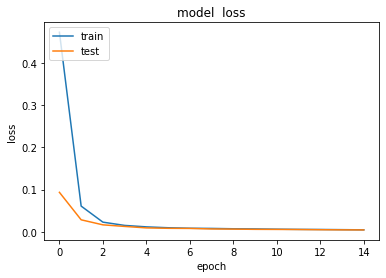

In [ ]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model  loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 15, 15]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 101.5754730215507


C:\Users\Alaa\AppData\Local\Temp\ipykernel_16944\3720237006.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 99.54425315282356


C:\Users\Alaa\AppData\Local\Temp\ipykernel_16944\3720237006.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


3 Parameters: batch_size: 5 - epochs: 15 Accuracy: 100.67761257338049


C:\Users\Alaa\AppData\Local\Temp\ipykernel_16944\3720237006.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4 Parameters: batch_size: 5 - epochs: 15 Accuracy: 99.94616136832396


C:\Users\Alaa\AppData\Local\Temp\ipykernel_16944\3720237006.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 102.5000510784744


C:\Users\Alaa\AppData\Local\Temp\ipykernel_16944\3720237006.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 100.2539387435598


C:\Users\Alaa\AppData\Local\Temp\ipykernel_16944\3720237006.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


7 Parameters: batch_size: 10 - epochs: 15 Accuracy: 99.06582355400943


C:\Users\Alaa\AppData\Local\Temp\ipykernel_16944\3720237006.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


8 Parameters: batch_size: 10 - epochs: 15 Accuracy: 97.9636707050947


C:\Users\Alaa\AppData\Local\Temp\ipykernel_16944\3720237006.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 101.22494830140054


C:\Users\Alaa\AppData\Local\Temp\ipykernel_16944\3720237006.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 102.63056310934319


C:\Users\Alaa\AppData\Local\Temp\ipykernel_16944\3720237006.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


11 Parameters: batch_size: 15 - epochs: 15 Accuracy: 102.2619651135815


C:\Users\Alaa\AppData\Local\Temp\ipykernel_16944\3720237006.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


12 Parameters: batch_size: 15 - epochs: 15 Accuracy: 99.39659975261357


C:\Users\Alaa\AppData\Local\Temp\ipykernel_16944\3720237006.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 99.92908430796146


C:\Users\Alaa\AppData\Local\Temp\ipykernel_16944\3720237006.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 100.02185680084729


C:\Users\Alaa\AppData\Local\Temp\ipykernel_16944\3720237006.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


15 Parameters: batch_size: 20 - epochs: 15 Accuracy: 98.43917523217198


C:\Users\Alaa\AppData\Local\Temp\ipykernel_16944\3720237006.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


16 Parameters: batch_size: 20 - epochs: 15 Accuracy: 99.33773984999901


C:\Users\Alaa\AppData\Local\Temp\ipykernel_16944\3720237006.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


<AxesSubplot:xlabel='Parameters'>

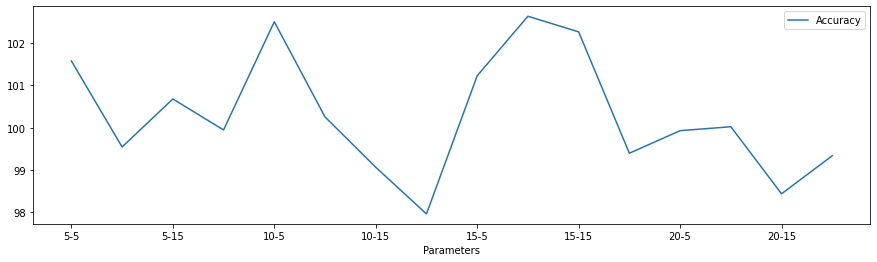

In [ ]:
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Relative Humidity']=y_test_orig
TestingData['Predicted Relative Humidity']=Predictions
TestingData.head()

,YEAR,MO,DY,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,...,WD50M,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,Relative Humidity,Predicted Relative Humidity
0,2000.0,11.0,2.0,98.25,5.72,8.21,4.08,4.13,81.62,8.55,...,81.94,17.76,8.23,12.99,18.08,11.59,23.64,12.05,57.06,56.519497
1,2015.0,6.0,19.0,97.53,5.35,8.91,3.33,5.58,320.38,7.66,...,320.06,30.54,3.60,17.07,31.75,15.98,39.06,23.08,18.75,18.944792
2,2000.0,3.0,31.0,97.69,3.78,6.73,1.19,5.53,60.19,5.42,...,60.38,23.51,-4.34,9.58,23.42,19.30,33.30,14.01,17.38,17.090036
3,1990.0,12.0,24.0,98.15,2.60,3.71,1.28,2.43,239.81,3.80,...,239.31,16.80,3.27,10.04,16.42,14.08,25.95,11.87,42.62,41.602283
4,2003.0,5.0,31.0,97.74,4.29,6.16,2.66,3.50,326.38,6.29,...,326.00,26.15,5.71,15.93,27.38,12.98,32.85,19.88,28.56,28.162210


In [ ]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Relative Humidity']-TestingData['Predicted Relative Humidity'])/TestingData['Relative Humidity'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 97.87434464378646


,YEAR,MO,DY,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,...,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,Relative Humidity,Predicted Relative Humidity,APE
0,2000.0,11.0,2.0,98.25,5.72,8.21,4.08,4.13,81.62,8.55,...,17.76,8.23,12.99,18.08,11.59,23.64,12.05,57.06,56.519497,0.947254
1,2015.0,6.0,19.0,97.53,5.35,8.91,3.33,5.58,320.38,7.66,...,30.54,3.60,17.07,31.75,15.98,39.06,23.08,18.75,18.944792,1.038890
2,2000.0,3.0,31.0,97.69,3.78,6.73,1.19,5.53,60.19,5.42,...,23.51,-4.34,9.58,23.42,19.30,33.30,14.01,17.38,17.090036,1.668375
3,1990.0,12.0,24.0,98.15,2.60,3.71,1.28,2.43,239.81,3.80,...,16.80,3.27,10.04,16.42,14.08,25.95,11.87,42.62,41.602283,2.387885
4,2003.0,5.0,31.0,97.74,4.29,6.16,2.66,3.50,326.38,6.29,...,26.15,5.71,15.93,27.38,12.98,32.85,19.88,28.56,28.162210,1.392821


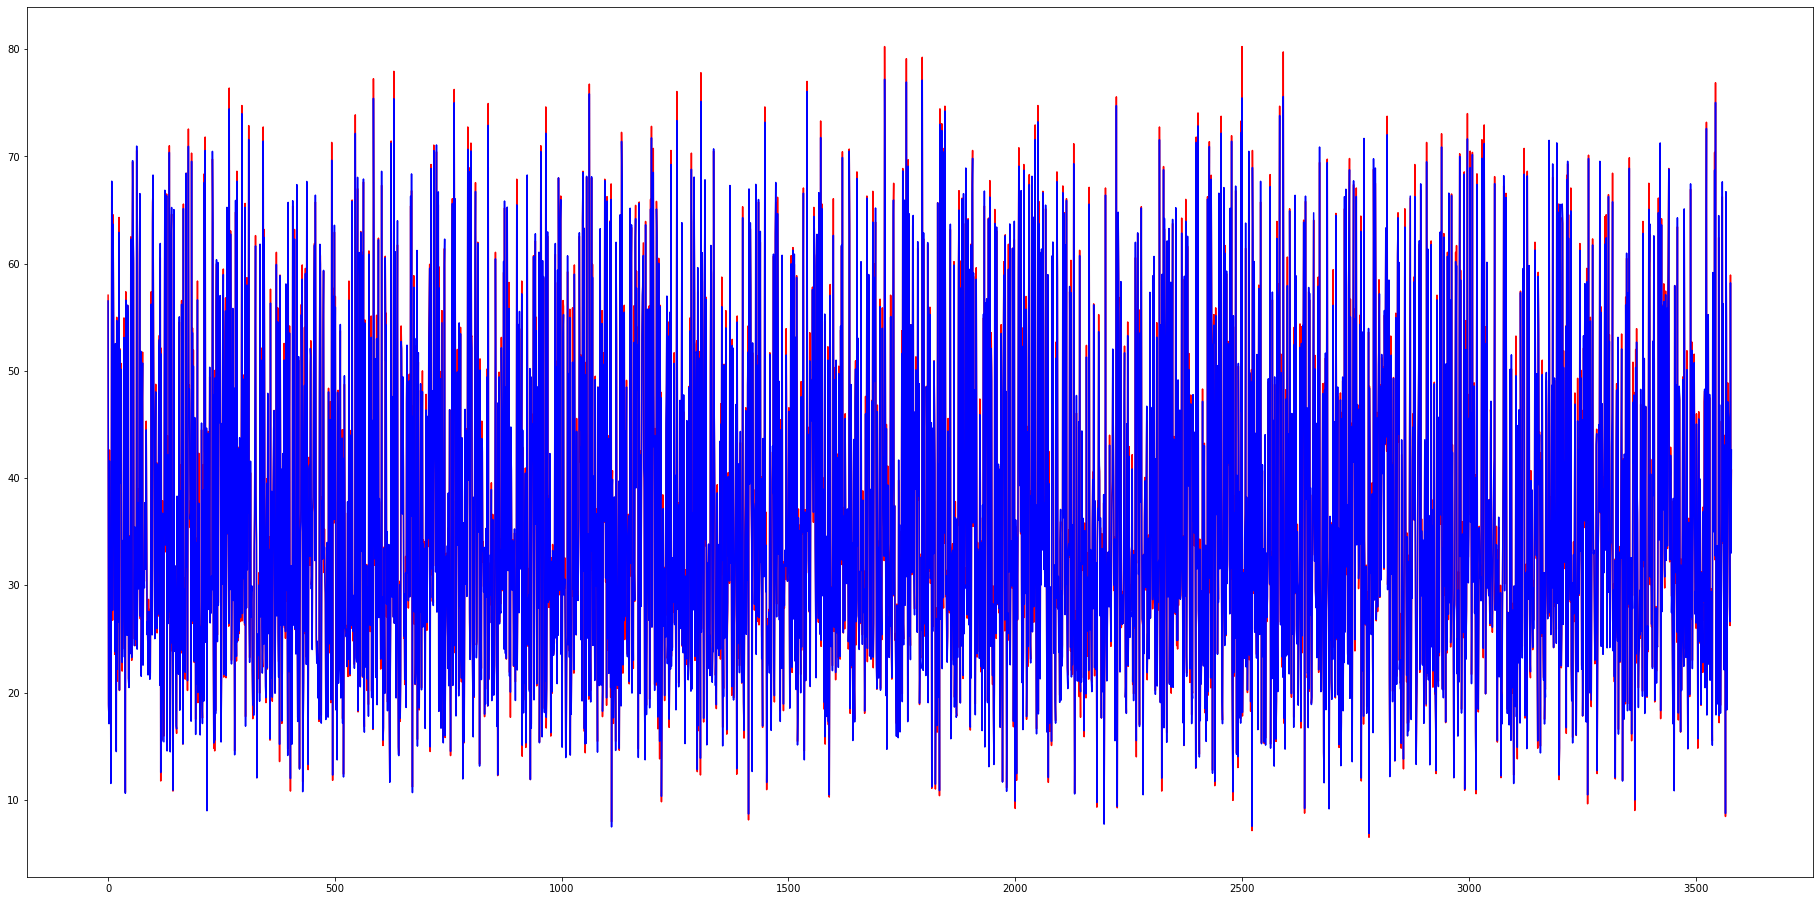

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(32,16))

#plt.plot(data.index,data['RH2M'],"g")
plt.plot(TestingData.index,TestingData['Relative Humidity'],"r")
plt.plot(TestingData.index,TestingData['Predicted Relative Humidity'],"b")
plt.show()

In [ ]:
X_train[0]

array([ 1.07744327, -0.14023276, -1.21899795, -0.92917537,  0.11731045,
        0.63442169, -0.39589041,  1.21630343, -0.7974665 , -0.01844883,
        1.38981927, -0.84619772,  2.55148041, -0.7859057 ,  1.81794624,
        0.09285123,  1.35040593,  1.74903022,  1.64888585,  1.94786355,
        1.67268557])

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_train= mean_squared_error(model.predict(X_train),y_train)
MSE_test= mean_squared_error(model.predict(X_test),y_test)
print(MSE_train)
print(MSE_test)

0.0039039427659674714
0.004027689134134396
